# Week-1 Assignment

**Welcome to your first assignment for the SimuTech Winter Project 2022! I hope you are excited to implement and test everything you have learned up until now. There is an interesting set of questions for you to refine your acquired skills as you delve into hands-on coding and deepen your understanding of numpy, pandas, and data visualization libraries.**

P.S. You might find use of functions which you have never used before.So feel free to google

In [1084]:
# from google.colab import drive
# drive.mount('/content/drive')

# Section0 : Importing Libraries

*Let's begin by importing numpy, pandas and matplotlib.*

In [1085]:
#your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Section1 : Playing with Python and Numpy

### Q1. Matrix Multiplication

##### (i) Check if matrix multiplication is valid

In [1086]:
def isValid(A,B):
  # For 2d arrays
  if A.ndim == 2 and B.ndim == 2:
    # Checking if there are as many rows in B as there are columns in A
    if A.shape[-1] == B.shape[-2]:
      return True
    else:
      return False
    
  # For Higher Dimensional Arrays
  else:
    # Checking if shape in dimensions greater than 3 are equal or not
    if A.shape[:-2] == B.shape[:-2]:
      # Checking if 2D arrays are compatible or not
      if A.shape[-1] == B.shape[-2]:
        return True
      else:
        return False
    else:
      return False

##### (ii) Using loops (without using numpy)

In [1087]:
def matrix_multiply(A,B):
  # WORKS ONLY FOR 2D ARRAYS
  if isValid(A,B):

    result = np.random.rand(A.shape[0], B.shape[1])

    for row_index in range(A.shape[0]):
        for column_index in range(B.shape[1]):
            instance = 0
            for item_index in range(A.shape[1]):
                instance += A[row_index, item_index] * B[item_index, column_index]

            result[row_index, column_index] = instance

    return result
  else:
      return "Not Possible to multiply"

# EXAMPLE 1
a = np.array([[1,2,3], [4,5,6]])
b= np.array([[3,2], [5,4], [6,5]])
print(matrix_multiply(a,b))
print(a@b)

# EXAMPLE 2
a = np.array([[1,2,3], [4,5,6]])
b= np.array([[5,4], [6,5]])
print(matrix_multiply(a,b))

[[31. 25.]
 [73. 58.]]
[[31 25]
 [73 58]]
Not Possible to multiply


##### (iii) Using numpy

In [1088]:
def matrix_multiply_2(A,B):
  return np.matmul(A,B)

# EXAMPLE
a = np.array([[1,2,3], [4,5,6]])
b= np.array([[3,2], [5,4], [6,5]])
print(matrix_multiply(a,b))
print(a@b)

[[31. 25.]
 [73. 58.]]
[[31 25]
 [73 58]]


##### (iv) Testing your code

Run the following cell to check if your functions are working properly.

*Expected output:*
[ [102 108 114]
 [246 261 276]
 [390 414 438]
 [534 567 600] ]

In [1089]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

B = np.array([
    [13, 14, 15],
    [16, 17, 18],
    [19, 20, 21]
])

if isValid(A,B):
  print(f"Result using loops: {matrix_multiply(A,B)}")
  print(f"Result using numpy: {matrix_multiply_2(A,B)}")
else:
  print(f"Matrix multiplication is not valid")

Result using loops: [[102. 108. 114.]
 [246. 261. 276.]
 [390. 414. 438.]
 [534. 567. 600.]]
Result using numpy: [[102 108 114]
 [246 261 276]
 [390 414 438]
 [534 567 600]]


### Q2. Z-Score Normalisation

Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1.

We use the following formula to perform a z-score normalization on every value in a dataset:

New value = (x – μ) / σ

where:

x: Original value

μ: Mean of data

σ: Standard deviation of data

##### (i) Without using numpy

In [1090]:
def mean(x):
  # Generating Sum
  Sum = 0
  for item in x:
    Sum += item
  
  # Returning Mean
  return Sum/len(x)

In [1091]:
def standard_deviation(x):
  # Generating Sum of squared differences from mean
  Sum = 0
  for item in x:
    Sum += (item - mean(x))**2
  
  # Returning Std
  return (Sum/len(x))**(0.5)

In [1092]:
def zscore_normalisation(x):
  # Assuming x to be a list
  # Assigning new values to items
  return np.array([(item - mean(x))/standard_deviation(x) for item in list(x)], dtype='f')

##### (ii) Using numpy

Numpy has in_built functions for calculating mean and standard deviation

In [1093]:
def zscore_normalisation_2(x):
  arr = np.array(x)
  # Assigning new values to items
  return (arr - np.mean(arr))/np.std(arr)

##### (iii) Testing your code

Run the following cell to check if your functions are working properly.

*Expected Output:* [-1.06753267 -0.99745394 -0.99745394 -0.81057732 -0.41346451 -0.06307086
  0.31068237  0.91803138  1.22170588  1.89913361]

In [1094]:
x = [4, 7, 7, 15, 32, 47, 63, 89, 102, 131]
print(f"Result without using numpy: {zscore_normalisation(x)}")
print(f"Result using numpy: {zscore_normalisation_2(x)}")

Result without using numpy: [-1.0675327  -0.9974539  -0.9974539  -0.81057733 -0.41346452 -0.06307086
  0.3106824   0.9180314   1.2217059   1.8991336 ]
Result using numpy: [-1.06753267 -0.99745394 -0.99745394 -0.81057732 -0.41346451 -0.06307086
  0.31068237  0.91803138  1.22170588  1.89913361]


### Q3. Sigmoid fn and its derivative

The sigmoid function is a mathematical function that maps any input value to a value between 0 and 1.

It is defined mathematically as s(x) = 1/(1+e^(-x)).

##### (i) Write a fn to implement sigmoid fn

In [1095]:
def sigmoidfn(x):
  return 1 / (1 + np.e**(-x))

##### (ii) Write a fn to implement derivative of sigmoid fn

In [1096]:
def derivative(x):
  return -((sigmoidfn(x))**2)*(np.e**(-x))

##### (iii) Test your code

Run the following cell to check if your functions are working properly.

*Expected output:*

x on applying sigmoid activation fn is: [ [0.99987661 0.88079708 0.99330715 0.5        0.5       ]
 [0.99908895 0.99330715 0.5        0.5        0.5       ] ]

x on applying derivative of sigmoid activation fn is: [ [-1.23379350e-04 -1.04993585e-01 -6.64805667e-03 -2.50000000e-01
  -2.50000000e-01]
 [-9.10221180e-04 -6.64805667e-03 -2.50000000e-01 -2.50000000e-01
  -2.50000000e-01] ]

In [1097]:
x = np.array([
    [9,2,5,0,0],
    [7,5,0,0,0]
])
print(f"x on applying sigmoid activation fn is: {sigmoidfn(x)}")
print(f"x on applying derivative of sigmoid activation fn is: {derivative(x)}")

x on applying sigmoid activation fn is: [[0.99987661 0.88079708 0.99330715 0.5        0.5       ]
 [0.99908895 0.99330715 0.5        0.5        0.5       ]]
x on applying derivative of sigmoid activation fn is: [[-1.23379350e-04 -1.04993585e-01 -6.64805667e-03 -2.50000000e-01
  -2.50000000e-01]
 [-9.10221180e-04 -6.64805667e-03 -2.50000000e-01 -2.50000000e-01
  -2.50000000e-01]]


# Section 2: Playing with Pandas

### Read the csv file


In [1098]:
df = pd.read_csv("superheated_vapor_properties.csv")
df

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,V,1.0000,129200.0000,160640.0000,172180.0000,183720.0000,195270.0000,206810.0000,218350.0000,...,NaN,333730.0000,NaN,356810.0000,NaN,379880.0000,NaN,402960.0000,NaN,426040.0000
1,1.0,U,29.3340,2385.2000,2480.8000,2516.4000,2552.3000,2588.5000,2624.9000,2661.7000,...,NaN,3049.9000,NaN,3132.4000,NaN,3216.7000,NaN,3302.6000,NaN,3390.3000
2,1.0,H,29.3350,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,NaN,3383.6000,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000
3,1.0,S,0.1060,8.9767,9.3828,9.5136,9.6365,9.7527,9.8629,9.9679,...,NaN,10.8200,NaN,10.9612,NaN,11.0957,NaN,11.2243,NaN,11.3476
4,10.0,V,1.0100,14670.0000,16030.0000,17190.0000,18350.0000,19510.0000,20660.0000,21820.0000,...,NaN,33370.0000,NaN,35670.0000,NaN,37980.0000,NaN,40290.0000,NaN,42600.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,11200.0,S,3.4440,5.5476,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2491,6.3515,6.4452,6.5324,6.6147,6.6929,6.7679,6.8401,6.9099,6.9777
540,11400.0,V,1.5040,15.2840,NaN,NaN,NaN,NaN,NaN,NaN,...,24.1040,25.5990,27.0100,28.3590,29.6610,30.9250,32.1600,33.3700,34.5600,35.7330
541,11400.0,U,1450.0000,2527.2000,NaN,NaN,NaN,NaN,NaN,NaN,...,2873.1000,2929.4000,2982.6000,3033.9000,3083.9000,3133.1000,3181.9000,3230.4000,3278.8000,3327.2000
542,11400.0,H,1467.2000,2701.5000,NaN,NaN,NaN,NaN,NaN,NaN,...,3147.9000,3221.2000,3290.5000,3357.2000,3422.1000,3485.7000,3548.5000,3610.8000,3672.8000,3734.6000


### Display the shape of data frame


In [1099]:
print(df.shape)

(544, 37)


### Return an array containing names of all the columns

In [1100]:
print(np.array(df.columns))

['Pressure' 'Property' 'Liq_Sat' 'Vap_Sat' '75' '100' '125' '150' '175'
 '200' '220' '225' '240' '250' '260' '275' '280' '290' '300' '320' '325'
 '340' '350' '360' '375' '380' '400' '425' '450' '475' '500' '525' '550'
 '575' '600' '625' '650']


### Display the number of null values in each column of the dataframe

In [1101]:
print(df.isnull().sum(axis = 0))

Pressure      0
Property      0
Liq_Sat       0
Vap_Sat       0
75          528
100         508
125         488
150         448
175         384
200         320
220         408
225         400
240         408
250         344
260         384
275         340
280         380
290         488
300          60
320         480
325         136
340         476
350          68
360         476
375         204
380         476
400           0
425         204
450           0
475         204
500           0
525         272
550           0
575         340
600           0
625         476
650           0
dtype: int64


### Create a column which contains the Pressure and Property columns, seperated with 'at' (For eg. V at 1, H at 101.325). Using this print the following:
- Enthalpy at 75 kPa and 573 K
- Entropy at 493 K and 250 kPa



In [1102]:
# Creating a new column 'Property at Pressure'
df['Property at Pressure'] = df['Property'] + " at " + df["Pressure"].astype(str)
df 
# Printing Available columns, since 493 K and 573 K are not available in the dataset
idx1 = df[df['Property at Pressure'] == 'H at 75.0'].index
idx2 = df[df['Property at Pressure'] == 'S at 250.0'].index

print(f"Enthalpy at 75 kPa and 550 K is {df['550'].loc[idx1].item()}.")
print(f"Entropy at 500 K and 250 kPa is {df['500'].loc[idx2].item()}.")


Enthalpy at 75 kPa and 550 K is 3595.8.
Entropy at 500 K and 250 kPa is 8.4104.


### Find out the column with the highest number of missing values

In [1103]:
idx = df.isnull().sum().argmax()
print(df.columns[idx])

75


### What is the average enthalpy of Sat. Liq. at all different pressures in the dataset ?

In [1104]:
print(df['Liq_Sat'].iloc[2::4].mean())

936.9707720588235


### Separate out the V,U,H,S data from the dataset into V_data, U_data, H_data, S_data

In [1105]:
V_data = df[df['Property'] == 'V']
U_data = df[df['Property'] == 'U']
H_data = df[df['Property'] == 'H']
S_data = df[df['Property'] == 'S']

# Section 3: PLotting the PLOTS

### Plot the properties (specific volume, specific internal energy, specific enthalpy, specific entropy) vs Pressure for saturated liquid.

Note:
- Try using the subplot feature of matplotlib(Explore it!!)
- Provide appropriate title, labels, markersize and other parameters to the plot

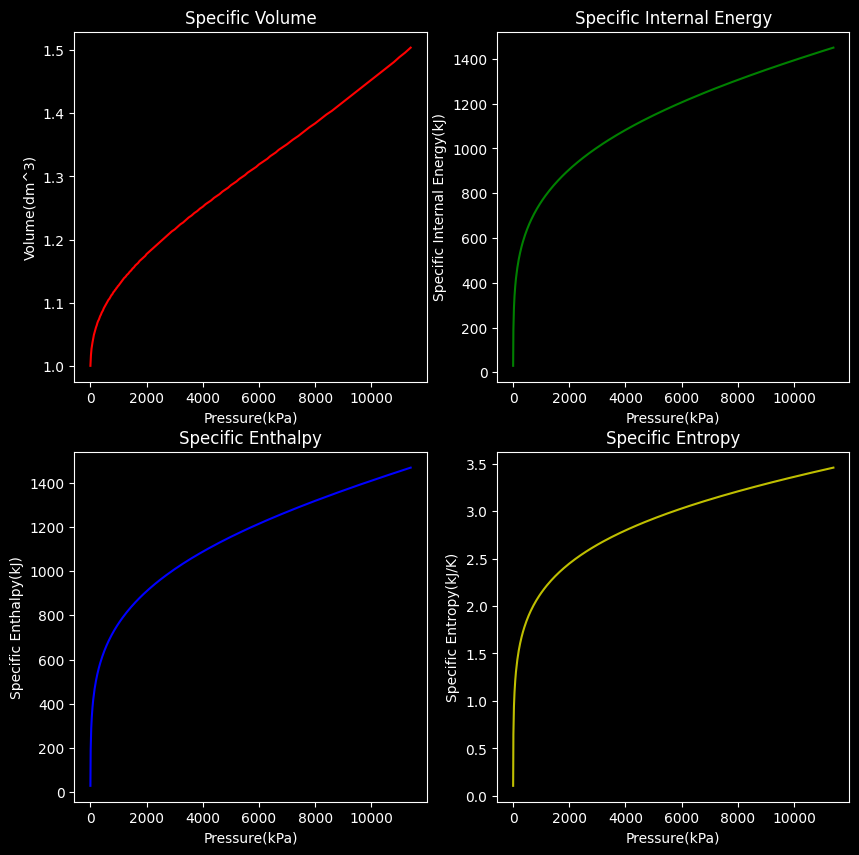

In [1106]:
x = df['Pressure'].iloc[::4]
v = df['Liq_Sat'].iloc[::4]
u = df['Liq_Sat'].iloc[1::4]
h = df['Liq_Sat'].iloc[2::4]
s = df['Liq_Sat'].iloc[3::4]

plt.style.use("dark_background")
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot(x, v, 'r')
plt.title("Specific Volume")
plt.xlabel("Pressure(kPa)")
plt.ylabel("Volume(dm^3)")

plt.subplot(2, 2, 2)
plt.plot(x, u, 'g')
plt.title("Specific Internal Energy")
plt.xlabel("Pressure(kPa)")
plt.ylabel("Specific Internal Energy(kJ)")

plt.subplot(2, 2, 3)
plt.plot(x, h, 'b')
plt.title("Specific Enthalpy")
plt.xlabel("Pressure(kPa)")
plt.ylabel("Specific Enthalpy(kJ)")

plt.subplot(2, 2, 4)
plt.plot(x, s, 'y')
plt.title("Specific Entropy")
plt.xlabel("Pressure(kPa)")
plt.ylabel("Specific Entropy(kJ/K)")

plt.show()

### Plot the specific volume of saturated liquid between 300 kPa and 1500 kPa

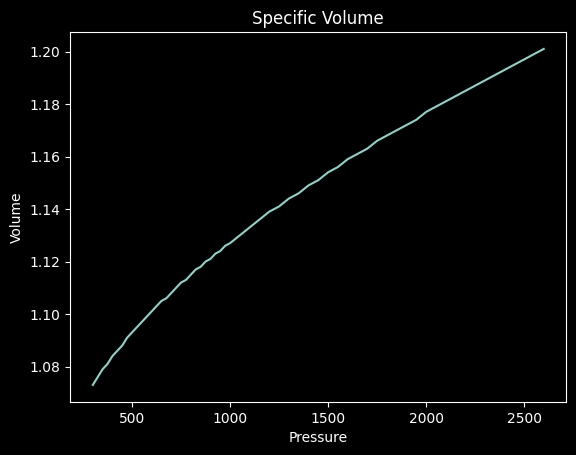

In [1107]:
# Obtaining correct x-inputs and y-inputs
x = np.array(x)
x_ = x[np.where(x >= 300)]
x_ = x_[np.where(x <= 1500)]

v_ = np.array(v)
v_ = v_[np.where(x >= 300)]
v_ = v_[np.where(x <= 1500)]

plt.style.use("dark_background")
plt.plot(x_,v_)
plt.title("Specific Volume")
plt.xlabel("Pressure")
plt.ylabel("Volume")
plt.show()

# Linear Regression
You're given a 100 data points generated from the function
$y=mx+c$. Some noise is added to the y values.

**Task:** Estimate the values of m and c using linear regression. Write a suitable cost function and update the parameters.

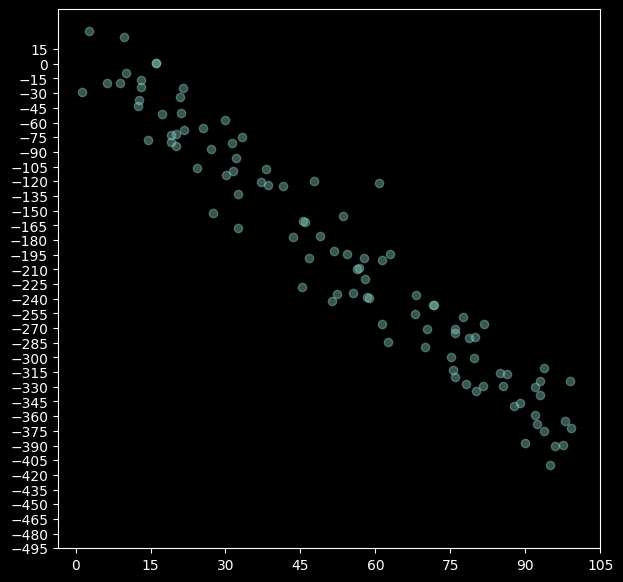

In [1108]:
 # Generation of data points
x = np.random.rand(100)*100
y = -4*x+15
y = y+np.random.randn(100)*30
plt.figure(figsize=(7,7))
plt.scatter(x,y,alpha=0.4)
plt.xticks(np.arange(0,115,15))
plt.yticks(np.arange(-495,30,15))
plt.show()

In [1109]:
# Initialisng parameters m and c such that the best fit line is given by y = m*x+c
m = -3.5
c = 14.5
#Cost function to be minimised
def costFunction(x: np.ndarray, y: np.ndarray, para1: float, para2: float):
    # Assuming x and y to be a one dimensional array
    return ((np.linalg.norm(para1*x + para2 - y))**2)/x.size

#Function for updating parameter
def updateParameters(x: np.ndarray, y: np.ndarray, para1: float, para2: float, learning_rate: tuple):
    # learning_rate will be the step
    # assuming x, y to be column matrices
    parameter1 = para1
    parameter2 = para2
    n = x.size
    # calculating the gradient of loss function at (m,c)
    # Partial Derivative wrt parameter1 will be (2/n)*(x.T @ (mx + c -y)) ny using linear algebra
    d1 = (2/n)*(x.reshape(1,100)@(para1*x + para2 - y))
    # Partial Derivative wrt parameter2 will be (2/n)*((mx + c -y).sum()) ny using linear algebra
    d2 = (2/n)*((para1*x + para2 - y).sum())
    # taking step
    parameter1 -= learning_rate[0]*d1.item(0)
    parameter2 -= learning_rate[1]*d2
    
    return parameter1, parameter2

Run the model

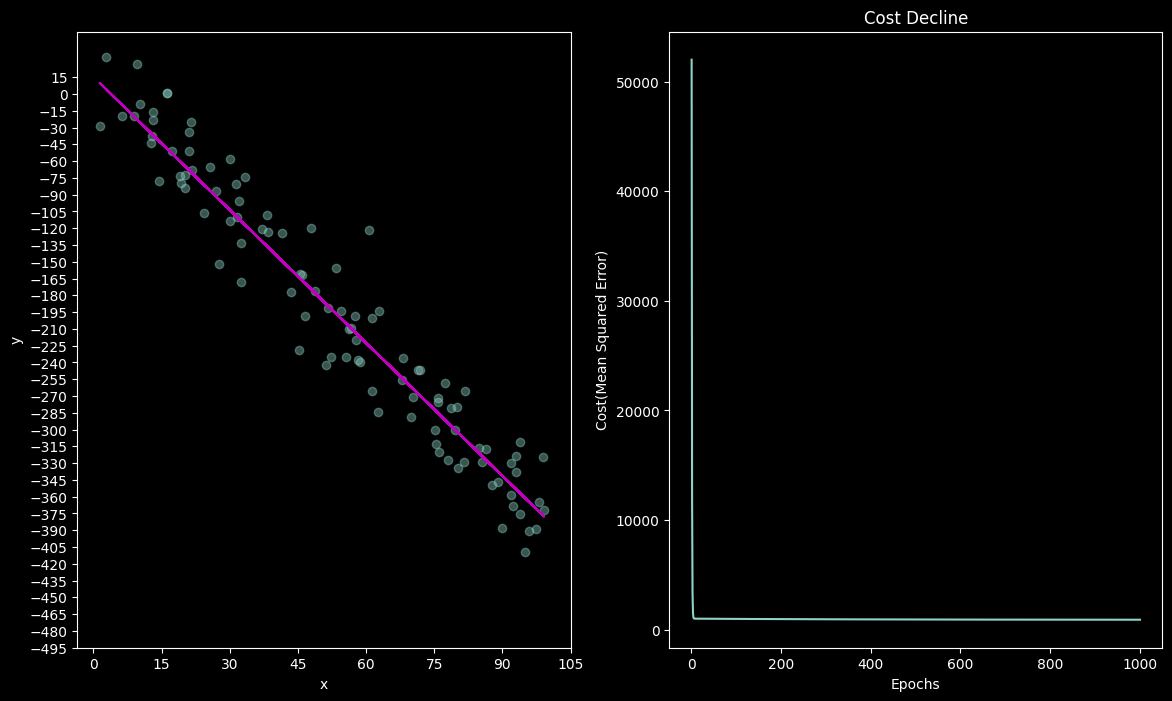

In [1110]:
# define number of iterations for minimising cost function
iterations = 1000
# define the learning rate
learning_rate1 = 0.0002
learning_rate2 = 0.003
# run the model
# taking steps and making note of it
epochs = np.arange(1,iterations+1)
cost_history = np.empty((iterations))
m, c = 0, 0
# starting the loop
for _ in range(iterations):
    # evaluatig cost 
    cost = costFunction(x=x, y=y, para1=m, para2=c)

    # appending the history
    cost_history[_] = cost
    
    # take steps
    m, c = updateParameters(x=x, y=y, para1=m, para2=c, learning_rate=(learning_rate1,learning_rate2))

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.scatter(x,y,alpha=0.4)
plt.plot(x, m*x+c, "m")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks(np.arange(0,115,15))
plt.yticks(np.arange(-495,30,15))

plt.subplot(1,2,2)
plt.plot(epochs, cost_history)
plt.title("Cost Decline")
plt.xlabel("Epochs")
plt.ylabel("Cost(Mean Squared Error)")
plt.show()


In [1111]:
print(m,c)  # value should be close to (-4,15)

-3.963347011541031 15.302004914448565
